# **The power of word repetition during the last Apple event:**


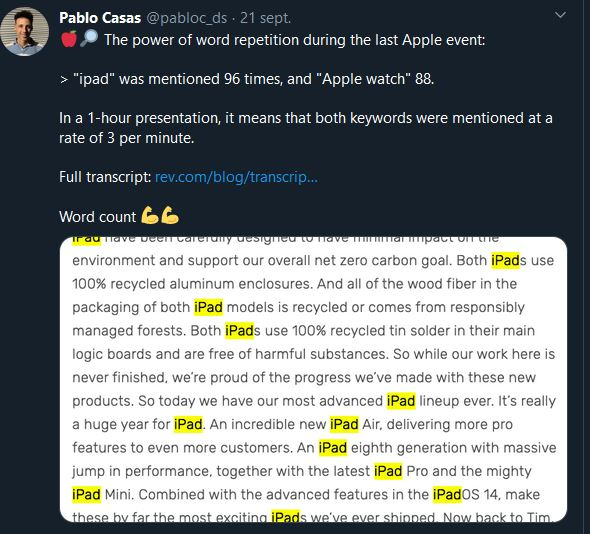

## Librerias a utilizar

In [ ]:
from bs4 import BeautifulSoup
import requests
import re

## Dirección (url) de interés

In [ ]:
url_interes = "https://www.rev.com/blog/transcripts/apple-event-2020-transcript-september-15"

In [ ]:
page = requests.get(url_interes)
soup = BeautifulSoup(page.content,"html.parser")

In [ ]:
contenido = soup.find_all('div','fl-callout-text')

## ResultSet -> str y retirar los '< div >'

In [ ]:
#contenido

In [ ]:
#ejemplo
texto = " hola nico"
print(texto)
texto = re.sub("nico","Rubén y Lautaro",texto)
texto

 hola nico


' hola Rubén y Lautaro'

In [ ]:
str_contenido = str(contenido)
# Remover los <div class="fl-callout-text">
str_contenido = re.sub('<div class="fl-callout-text">',"", str_contenido)
# Remover los </div>
str_contenido = re.sub('\n</div>',"", str_contenido)

In [ ]:
str_contenido

'[<p>Tim Cook: (<a data-wpel-link="exclude" href="https://www.rev.com/transcript-editor/shared/x5sU0xA8syRlfKWY6IMDutTgmX8dRTdSXUgkt0AyYJYvQncOV-bo0Dh3vr5jthvEt7Z6tObOZr_nvQbiw2UEwYIaI44?loadFrom=PastedDeeplink&amp;ts=248.52" rel="nofollow" target="_blank">04:08</a>)<br/>\nGood morning and welcome. We are so pleased that you could join us today. We’ve got some really exciting product announcements to share with you.</p>\n<p>Tim Cook: (<a data-wpel-link="exclude" href="https://www.rev.com/transcript-editor/shared/x5sU0xA8syRlfKWY6IMDutTgmX8dRTdSXUgkt0AyYJYvQncOV-bo0Dh3vr5jthvEt7Z6tObOZr_nvQbiw2UEwYIaI44?loadFrom=PastedDeeplink&amp;ts=257.38" rel="nofollow" target="_blank">04:17</a>)<br/>\nAs we all continue to make our way through these difficult times and face the challenges that COVID-19 is causing in our communities around the world, it’s so inspiring how people everywhere have adapted. Working remotely, learning from home, and gathering virtually to stay close to family and friends.

## Separamos por < p > con split

In [ ]:
# ejemplo
texto = "hola , como, estas, bien"
texto.split(",")

[' hola ', ' como', ' estas', ' bien']

In [ ]:
columnas = str_contenido.split('</p>')

In [ ]:
len(columnas)

128

In [ ]:
columnas[0]

'[<p>Tim Cook: (<a data-wpel-link="exclude" href="https://www.rev.com/transcript-editor/shared/x5sU0xA8syRlfKWY6IMDutTgmX8dRTdSXUgkt0AyYJYvQncOV-bo0Dh3vr5jthvEt7Z6tObOZr_nvQbiw2UEwYIaI44?loadFrom=PastedDeeplink&amp;ts=248.52" rel="nofollow" target="_blank">04:08</a>)<br/>\nGood morning and welcome. We are so pleased that you could join us today. We’ve got some really exciting product announcements to share with you.'

In [ ]:
columnas

In [ ]:
# ejemplo
texto = "hola soy una letra a"
re.findall('a',texto)

[]

In [ ]:
# en teoría tenemos 128 columnas = > p => comentarios
#len(columnas)

128

In [ ]:
# extraer orador:
def extraer_autor(strings):
  #'''retorna el contenido entre <p> y :'''
  inicio = re.search('<p>',strings)
  fin = re.search(':',strings)
  return strings[inicio.end():fin.start()]
# extraer horario

def extraer_horario(strings):
  #''' retorna el tiempo donde se dice esta frase'''
  # dependiendo si es más de una hora o no

  # puede tener horarios dentro de las oraciones entonces .. lo busco hasta el 
  # </br>
  br = re.search('<br/>',strings)
  strings =strings[:br.start()]
  tiempo = re.findall(r'\d\d:\d\d:\d\d',strings)
  
  if tiempo == []:
    tiempo = re.findall(r'\d\d:\d\d',strings)
  
  return tiempo[0]
  
def extraer_frases(strings):
  #'''retorna el texto hablado'''
  return strings.split('\n')[-1]

In [ ]:
lst_tiempo = []
lst_autor  = []
lst_frases = []

for columna in columnas[0:-1]:
  #print(extraer_oraciones(columna))
  #print("-----")
  lst_tiempo.append(extraer_horario(columna))
  lst_autor.append(extraer_autor(columna))
  lst_frases.append(extraer_frases(columna))

In [ ]:
lst_frases[0]

'Good morning and welcome. We are so pleased that you could join us today. We’ve got some really exciting product announcements to share with you.'

In [ ]:
import pandas as pd

data = {'tiempo': lst_tiempo,
        'autor': lst_autor,
        'texto': lst_frases
        }
df_appleEvent = pd.DataFrame(data, columns = ['tiempo', 'autor','texto'])

In [ ]:
df_appleEvent.head()

,tiempo,autor,texto
0,04:08,Tim Cook,Good morning and welcome. We are so pleased th...
1,04:17,Tim Cook,As we all continue to make our way through the...
2,04:53,Tim Cook,"Here at Apple, we feel a deep responsibility t..."
3,05:13,Tim Cook,Apple Watch revolutionized what a watch can do...
4,06:06,Tim Cook,And it’s so reassuring for millions of custome...


## Trabajemos con el texto

In [ ]:
from pandas.core.common import flatten
import nltk

In [ ]:
def frecuencia_de_string(texto,string_buscado):
  #'''buscamos y devolvemos la cantidad de string hallados'''
  lst_string_buscado = re.findall(string_buscado,texto)
  return len(lst_string_buscado)

In [ ]:

# Tomemos todo lo que contiene la columna texto
lista_texto = list(flatten(df_appleEvent['texto']))
texto_plano = ''.join(str(e) for e in lista_texto)

print(" cantidad de iPad")
print(frecuencia_de_string(texto_plano,'iPad'))

print ("cantidad de Apple Watch")
frecuencia_de_string(texto_plano,'Apple Watch')

 cantidad de iPad
94
cantidad de Apple Watch


87

# Dejamos la frecuencia de la palabra de interés por frase

In [ ]:
df_appleEvent['cant_iPad'] = df_appleEvent['texto'].apply(frecuencia_de_string, string_buscado = 'iPad')
df_appleEvent['cant_AppleWatch'] = df_appleEvent['texto'].apply(frecuencia_de_string, string_buscado = 'Apple Watch')

In [ ]:
df_appleEvent

,tiempo,autor,texto,cant_iPad,cant_AppleWatch
0,04:08,Tim Cook,Good morning and welcome. We are so pleased th...,0,0
1,04:17,Tim Cook,As we all continue to make our way through the...,0,0
2,04:53,Tim Cook,"Here at Apple, we feel a deep responsibility t...",1,2
3,05:13,Tim Cook,Apple Watch revolutionized what a watch can do...,0,6
4,06:06,Tim Cook,And it’s so reassuring for millions of custome...,0,3
...,...,...,...,...,...
122,01:00:05,Deidre Caldbeck,So the photos and videos our customers take wi...,2,0
123,01:02:22,Deidre Caldbeck,(singing) So that’s the new iPad Air and we ca...,13,0
124,01:03:50,Tim Millay,What a great day of announcements. We will als...,3,0
125,01:04:57,Tim Millay,All of these new releases will be available to...,0,0


In [ ]:
df_appleEvent.iloc[120:126]

,tiempo,autor,texto,cant_iPad,cant_AppleWatch
120,58:53,Karim Morsy,Now we can build intelligent features into the...,0,0
121,59:03,Deidre Caldbeck,"With the A14 chip, the new era is going to bri...",3,0
122,01:00:05,Deidre Caldbeck,So the photos and videos our customers take wi...,2,0
123,01:02:22,Deidre Caldbeck,(singing) So that’s the new iPad Air and we ca...,13,0
124,01:03:50,Tim Millay,What a great day of announcements. We will als...,3,0
125,01:04:57,Tim Millay,All of these new releases will be available to...,0,0


# Ponemos la columna segundos para obtener la frecuencia de palabras por tiempo (seg)

In [ ]:
def hms_a_seg(tiempo):
  # recibe un string y devuelve un int en segundos
  total_segundos = ""
  h_m_s = tiempo.split(":")

  if len(h_m_s) == 2:
    #minuto y segundo
    minutos  = int(h_m_s[0])
    segundos = int(h_m_s[1])

    total_segundos = minutos*60+segundos

  elif len(h_m_s) == 3:
    #horas, minuto y segundo
    horas    = int(h_m_s[0])
    minutos  = int(h_m_s[1])
    segundos = int(h_m_s[2])

    total_segundos = horas*3600+ minutos*60+segundos
  else:
    #otra cosa
    print("esto no es un formato h:m:s")

  return total_segundos

In [ ]:
#crear la columna en segundos
df_appleEvent['tiempo_seg'] = df_appleEvent['tiempo'].apply(hms_a_seg)

In [ ]:
df_appleEvent.head()

,tiempo,autor,texto,cant_iPad,cant_AppleWatch,tiempo_seg
0,04:08,Tim Cook,Good morning and welcome. We are so pleased th...,0,0,248
1,04:17,Tim Cook,As we all continue to make our way through the...,0,0,257
2,04:53,Tim Cook,"Here at Apple, we feel a deep responsibility t...",1,2,293
3,05:13,Tim Cook,Apple Watch revolutionized what a watch can do...,0,6,313
4,06:06,Tim Cook,And it’s so reassuring for millions of custome...,0,3,366


In [ ]:
## normalizamos el tiempo_seg, normalizado = tiempo_seg - 248

In [ ]:
df_appleEvent['seg_normalizado'] = df_appleEvent['tiempo_seg']-248

In [ ]:
df_appleEvent.head()

,tiempo,autor,texto,cant_iPad,cant_AppleWatch,tiempo_seg,seg_normalizado
0,04:08,Tim Cook,Good morning and welcome. We are so pleased th...,0,0,248,0
1,04:17,Tim Cook,As we all continue to make our way through the...,0,0,257,9
2,04:53,Tim Cook,"Here at Apple, we feel a deep responsibility t...",1,2,293,45
3,05:13,Tim Cook,Apple Watch revolutionized what a watch can do...,0,6,313,65
4,06:06,Tim Cook,And it’s so reassuring for millions of custome...,0,3,366,118


In [ ]:
df_appleEvent['minutos'] = df_appleEvent['seg_normalizado']//60

In [ ]:
df_appleEvent.iloc[120:126]

,tiempo,autor,texto,cant_iPad,cant_AppleWatch,tiempo_seg,seg_normalizado,minutos
120,58:53,Karim Morsy,Now we can build intelligent features into the...,0,0,3533,3285,54
121,59:03,Deidre Caldbeck,"With the A14 chip, the new era is going to bri...",3,0,3543,3295,54
122,01:00:05,Deidre Caldbeck,So the photos and videos our customers take wi...,2,0,3605,3357,55
123,01:02:22,Deidre Caldbeck,(singing) So that’s the new iPad Air and we ca...,13,0,3742,3494,58
124,01:03:50,Tim Millay,What a great day of announcements. We will als...,3,0,3830,3582,59
125,01:04:57,Tim Millay,All of these new releases will be available to...,0,0,3897,3649,60


In [ ]:
int(20/3)

6

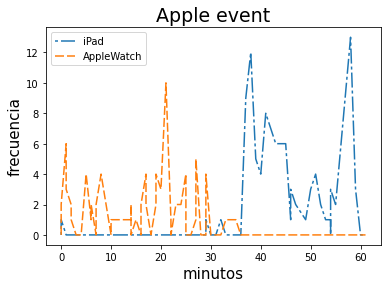

In [ ]:
import matplotlib.pyplot as plt

tiempo = df_appleEvent['seg_normalizado']//60 # lo paso a minutos
y = df_appleEvent['cant_iPad']
y2 = df_appleEvent['cant_AppleWatch']

fig, ax = plt.subplots()

line1, = ax.plot(tiempo, y, label='iPad')
line1.set_dashes([2, 2, 10, 2])  # 2pt line, 2pt break, 10pt line, 2pt break
line2, = ax.plot(tiempo, y2, dashes=[6, 2], label='AppleWatch')

plt.title("Apple event", fontsize=19)
plt.xlabel('minutos', fontsize=15)
plt.ylabel('frecuencia', fontsize=15)
ax.legend()
plt.show()

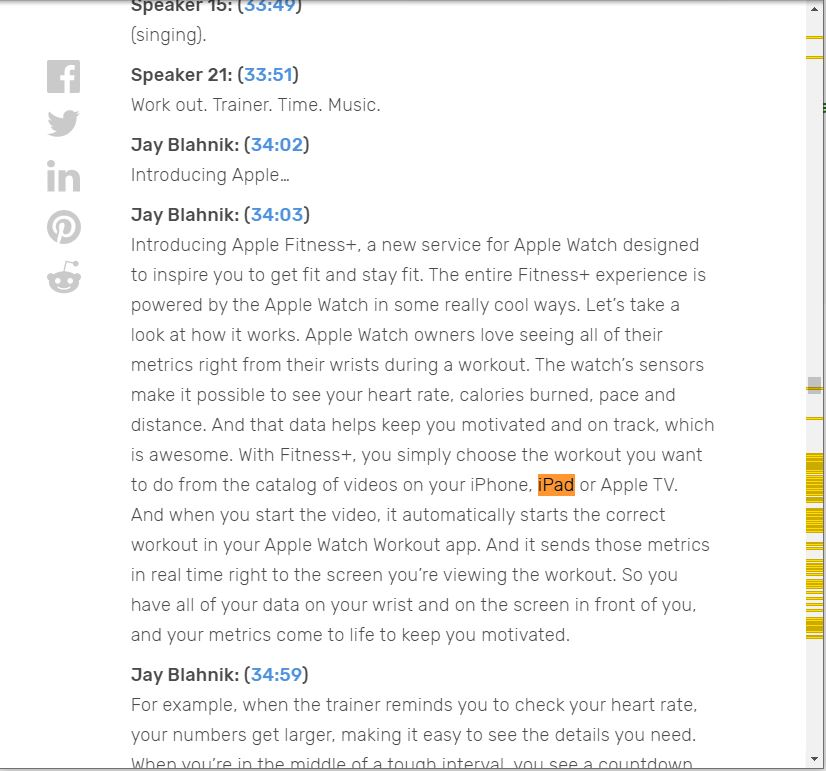

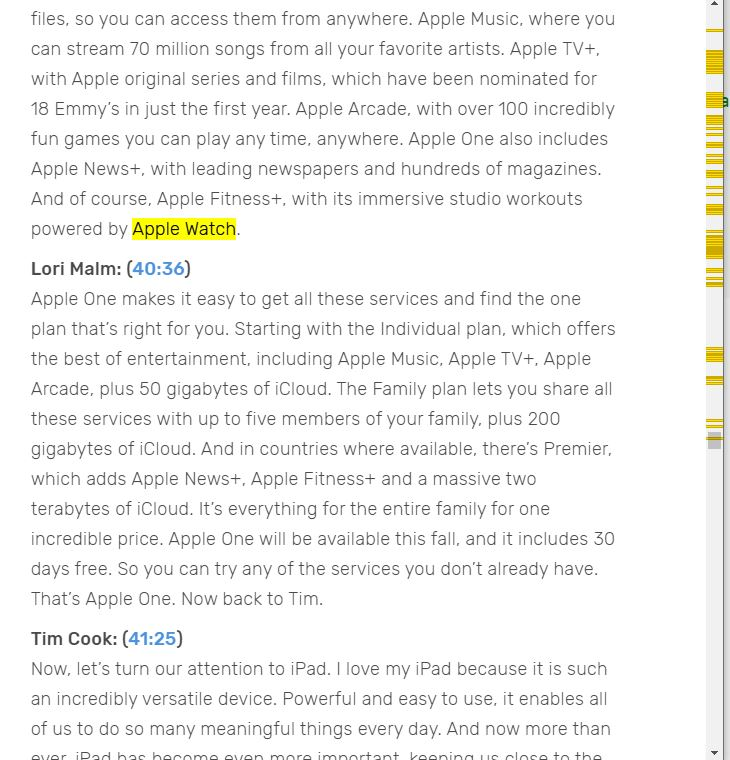

#**VAMOS DE NUEVO CON OTRA FORMA DE ENCARAR** 6-10-2020

# Extraemos el texto completo y con sus marcas de tiempo desde Youtube
https://www.youtube.com/watch?v=b13xnFp_LJs

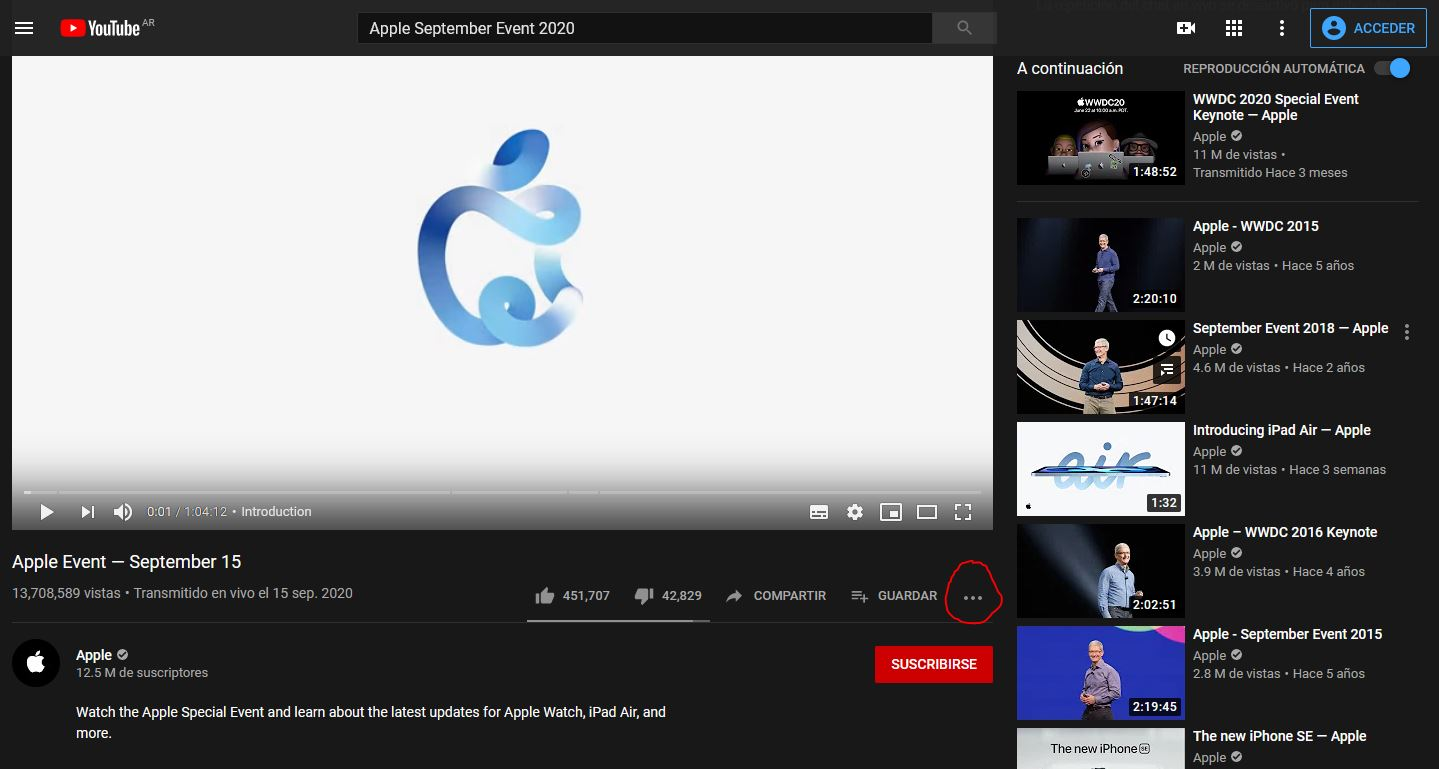

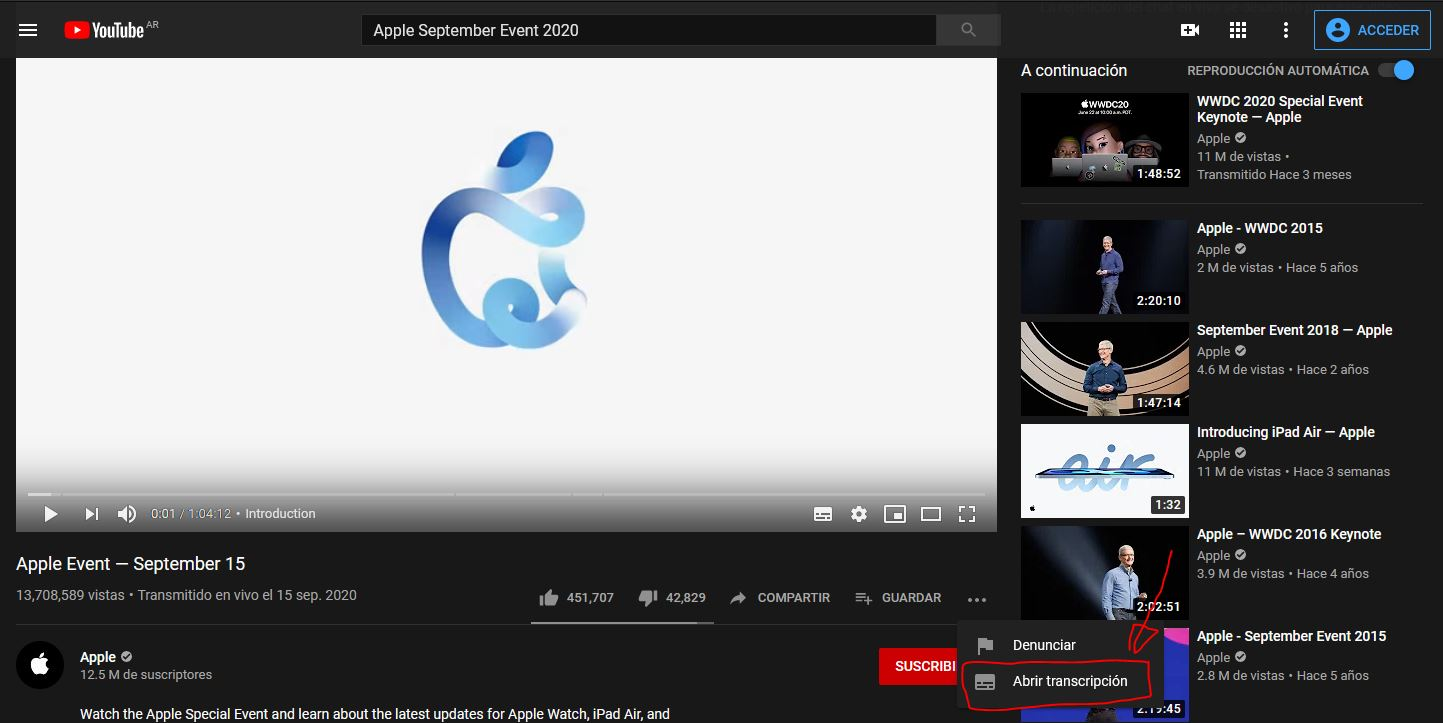

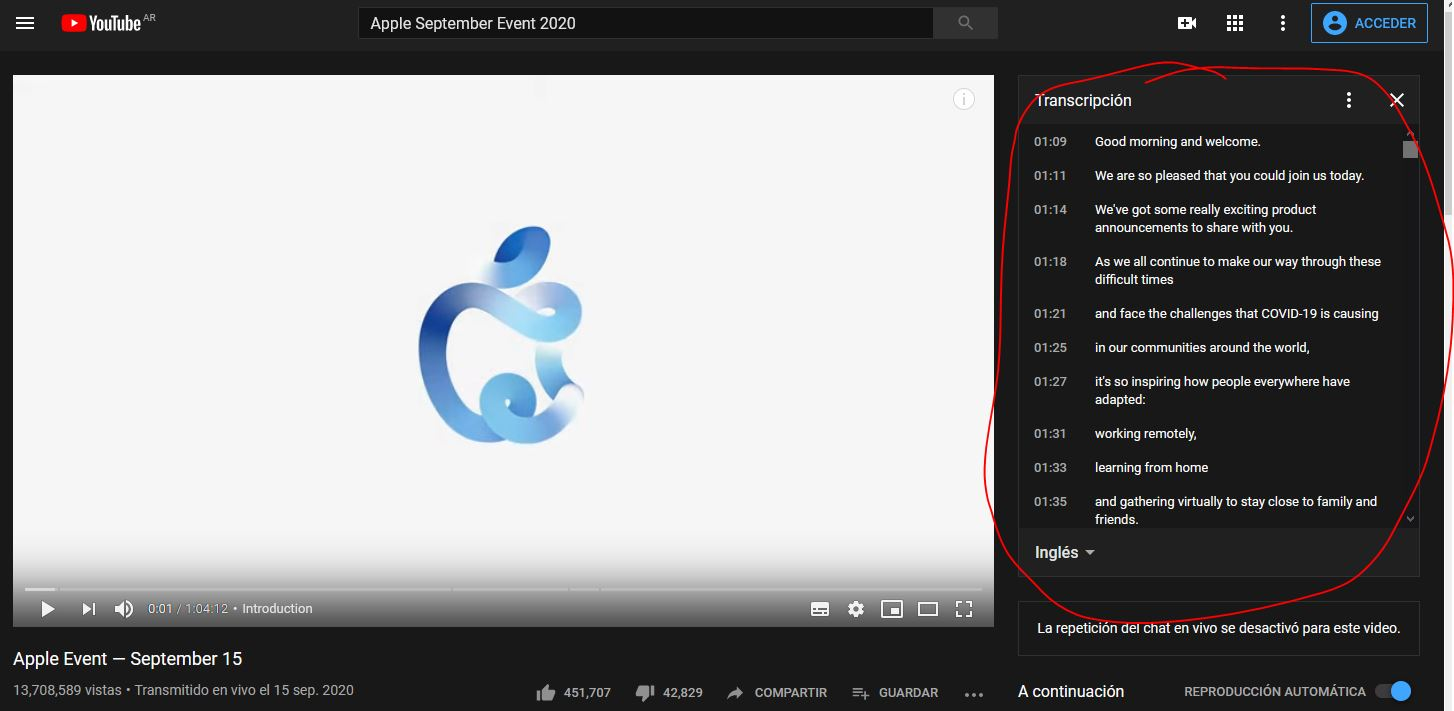

In [ ]:
transcripcion = '''01:09
Good morning and welcome.
01:11
We are so pleased that you could join us today.
01:14
We've got some really exciting product announcements to share with you.
01:18
As we all continue to make our way through these difficult times
01:21
and face the challenges that COVID-19 is causing
01:25
in our communities around the world,
01:27
it's so inspiring how people everywhere have adapted:
01:31
working remotely,
01:33
learning from home
01:35
and gathering virtually to stay close to family and friends.
01:39
And it's been gratifying to see
01:41
the important role our products have played
01:43
in helping people come together, carry on and move forward.
01:48
We know that life won't always be like this,
01:50
and we're all looking forward to better days.
01:54
Here at Apple, we feel a deep responsibility to keep innovating,
01:58
to continue making products that enrich people's lives in meaningful ways.
02:03
Today we're focusing on two products
02:05
that have played integral roles in people's everyday lives:
02:09
Apple Watch and iPad.
02:11
Let's get started with Apple Watch.
02:14
Apple Watch revolutionized what a watch can do.
02:18
If you think about it, for over 100 years,
02:20
the traditional watch really focused on just one thing: time.
02:26
Today, it's incredible what Apple Watch enables you to do
02:29
right from your wrist.
02:31
I use my Apple Watch and its amazing features throughout the day.
02:35
Before I go out in the morning, I check the weather.
02:38
At work, Apple Watch notifies me
02:41
with everything from messages to news alerts
02:43
and keeps me right on schedule.
02:46
I'm doing my best to stay in shape,
02:48
so it's great that Apple Watch keeps track of my workouts
02:51
and motivates me to close my rings.
02:54
When I get home, I use it to open the garage,
02:57
unlock my door and turn on the lights.
03:01
And when I'm ready to settle in,
03:03
I use Apple Watch to stream my favorite music.
03:07
And it's so reassuring for millions of customers
03:10
that Apple Watch has introduced great health features
03:13
like heart monitoring, cycle tracking and fall detection
03:16
and even the ability to take an ECG.
03:20
No wonder Apple Watch is the most loved watch in the world.
03:25
I love reading the many messages I get every day from Apple Watch users
03:29
telling me how the watch has changed, and in some cases, saved their lives.
03:35
Like Ray from Texas.
03:37
She'd been experiencing pain in her stomach,
03:40
but didn't think it was too serious.
03:42
When her Apple Watch alerted her to an elevated heart rate,
03:46
she realized it really was.
03:48
She went to the ER,
03:50
where it was determined she was in septic shock.
03:54
Ray got immediate intervention,
03:56
but she could have died without that warning from her Apple Watch.
04:00
Or Enrique from Spain,
04:02
who's blind and uses his watch for everything from speaking the time
04:07
to reminding him when his appointments are
04:09
to calling taxis and helping him keep fit.
04:13
For Enrique, his Apple Watch has become an essential part of his day-to-day life.
04:20
Now I'd like you to meet a few more of these people and hear their stories.
04:29
Dear Apple, my name is Kate.
04:33
It has always been my dream to become an Olympian,
04:37
but that can be hard with type 1 diabetes.
04:41
It was just so many shots and finger pricks every single day.
04:45
I went from having to check my blood sugar manually every 20 minutes
04:49
to now all I have to do is just glance down at my wrist,
04:54
which reads the insulin pack attached to my side.
04:56
[crowd cheering]
04:57
I feel like I don't have type 1 when I'm competing now.
05:01
[announcer] That is a US high-school record. That's unbelievable.
05:04
My name is YJ.
05:07
Back in February of 2019,
05:10
I was diagnosed with high blood pressure and hypertension.
05:14
The medications cost me $2,000 dollars a month, with insurance.
05:19
That was the tipping point for me.
05:21
I started tracking my exercises and started tracking my health,
05:26
all through my watch.
05:28
Almost 18 months later, I am not on any medications,
05:33
and I am in the best shape of my life.
05:38
My name is James.
05:40
We were sitting in the living room,
05:42
and I glanced down at my watch 'cause it kind of vibrated.
05:46
It flashed "Increased Heart Rate."
05:48
By the time we got to the hospital, my heart rate was 206,
05:53
and she said, "Sir, you're going into cardiac arrest."
05:58
I was 26.
06:01
I wanted my life,
06:02
and I didn't want my life just for me, but I wanted it for my family.
06:08
I'm thankful to still be here,
06:10
and I'm thankful for that device that saved me.
06:17
I really love hearing those stories
06:19
about how Apple Watch helps people and enriches their lives.
06:23
And healthcare providers, insurance companies and businesses
06:26
are also seeing the benefits of offering Apple Watch.
06:30
They know it can make a big difference
06:33
in the lives of their patients, customers and employees.
06:37
Recently, the Mount Sinai Health System in New York
06:40
launched the new Warrior Watch Study.
06:43
Using data from Apple Watch,
06:45
researchers are studying the impact of COVID
06:48
on the psychological well-being of frontline healthcare workers
06:52
by identifying early signs of stress
06:55
while also looking to predict infection before symptoms appear.
07:00
Singapore has one of the world's leading healthcare systems.
07:04
This fall, Singapore will become the first country
07:07
to leverage the benefits of Apple Watch
07:10
by offering incentives for people to use it to stay healthy and active.
07:16
Apple Watch helps people understand so much about their health and fitness
07:20
and to live a better day.
07:23
This year we're going to take it even further.
07:26
Here's Jeff to tell you what's next.
07:44
Apple Watch has made a profound impact
07:46
on so many of our customers' lives, and we continue to be inspired.
07:50
And this year, watchOS 7 adds several important health features
07:54
that take advantage of the powerful technology in Apple Watch.
07:57
The new Sleep app uses the motion sensors to track your sleep.
08:01
Automatic handwashing detection
08:03
recognizes the motion and sound when washing your hands
08:06
and encourages you to continue for the recommended 20 seconds.
08:09
And watchOS 7 now uses your motion and heart rate
08:12
to measure a lower range of VO2 Max values.
08:15
Now, the American Heart Association recommends
08:17
routinely assessing cardio fitness levels,
08:20
and VO2 Max is the most accurate way to capture this.
08:24
The problem is, it's usually only measured in specialty clinics.
08:28
Well, watchOS 7 can now measure a full range of VO2 Max,
08:32
which is a powerful predictor of your overall health.
08:36
And coming later this year,
08:38
you can receive a notification if your VO2 Max drops to those lower levels.
08:42
Each year, Apple Watch raises the bar,
08:46
adding new features and technology that improve our lives.
08:49
This year, Apple Watch takes another big leap forward.
08:53
And I'm excited to show it to you now.
09:35
This is the new Apple Watch Series 6.
09:38
The perfect combination of powerful features and beautiful design.
09:42
Series 6 is our most colorful lineup ever.
09:45
There's a new blue aluminum case,
09:47
this updated classic gold stainless steel finish,
09:51
a new gray-black stainless steel called Graphite
09:54
and for the first time, a stunning new Apple Watch (PRODUCT)RED.
09:59
Now on the inside, Series 6 is packed with incredible technology,
10:03
including a new health sensor that enables an amazing new capability.
10:08
Let's take a look.
10:43
With Apple Watch Series 6,
10:45
you can measure your blood oxygen right from your wrist.
10:49
The new health sensor in Series 6
10:51
shines red and infrared light onto your wrist
10:54
and measures the amount of light reflected back.
10:56
Advanced algorithms use this data to calculate the color of your blood,
11:00
which indicates the amount of oxygen present.
11:03
The new Blood Oxygen app lets you take a measurement in just 15 seconds.
11:08
[watch chimes]
11:11
And Series 6 also captures periodic background readings
11:15
and stores them in your Health app.
11:16
So if you wear your Apple Watch to bed,
11:19
it can record background measurements while you sleep.
11:22
I'll hand it over to Sumbul
11:23
to talk more about blood oxygen and its importance to your health.
11:29
Blood oxygen saturation, also known as SpO2, is like a vital sign.
11:34
It's a key measurement that contains
11:36
critical information about your breathing and circulation.
11:39
Apple Watch is already a powerful health tool,
11:42
with apps that measure heart rate and heart rhythm.
11:45
And now, adding blood oxygen
11:46
brings another valuable health measurement to users.
11:50
Blood oxygen and pulse oximetry
11:52
are terms that we've heard a lot about during the COVID pandemic.
11:56
As you breathe, your heart and lungs work together
11:58
to deliver oxygen throughout your body.
12:00
Blood oxygen saturation is an indication of how well this system is functioning
12:04
and of your overall respiratory and cardiac health.
12:08
And pulse oximetry is how you measure it.
12:11
Now, the Blood Oxygen app on Series 6 lets you measure your blood oxygen
12:15
for fitness and wellness purposes from your wrist
12:18
anywhere and at any time.
12:20
This is a great new tool for your overall well-being.
12:23
And to enable future medical discoveries,
12:26
we're launching three new health research studies
12:29
to learn how longitudinal blood oxygen measurements,
12:32
along with other health metrics from Apple Watch,
12:34
can help manage conditions that affect the heart and lungs.
12:37
First, to study how to better manage and control asthma
12:41
using physiological signals from Apple Watch,
12:44
we're collaborating with the pulmonary experts
12:46
at the University of California, Irvine and Anthem.
12:50
Second, to learn more about how metrics, including blood oxygen,
12:54
can be used to manage heart failure,
12:56
we're partnering with one of the largest research organizations in North America,
13:00
the University Health Network,
13:02
and the investigators at the University of Toronto.
13:05
And finally, as we all continue to learn more about COVID
13:09
and understand the interplay with influenza,
13:12
we're partnering with the investigators of the Seattle Flu Study
13:15
and faculty from the University of Washington School of Medicine.
13:19
We will explore how changes in blood oxygen and heart rate
13:22
could be early signals of the onset of these respiratory conditions.
13:26
So that's the new blood oxygen feature.
13:28
We're so excited to bring this important new health capability to our users.
13:33
Now, back to Jeff to tell you more about the new Apple Watch Series 6.
13:39
Whether you're measuring blood oxygen,
13:41
making a phone call on your watch
13:43
or simply checking your Activity Rings,
13:46
it's all made possible by Apple Silicon.
13:49
Inside Series 6 is our sixth-generation System in Package.
13:53
It's a purpose-built design that's absolutely unique in the industry.
13:56
It includes a high performance dual-core processor
13:59
based on the A13 Bionic in iPhone 11
14:01
but optimized for Apple Watch.
14:04
The S6 is up to 20% faster than the previous generation.
14:07
Series 6 also has great new features
14:10
that are perfect for when you're out and about.
14:13
Let's head outside and take a look.
14:26
Because of its energy-efficient design,
14:28
Series 6 has an even better Always-On Display,
14:32
making it easier to read your watch on sunny days
14:34
without having to wake the display.
14:36
Now it's two-and-a-half times brighter outdoors
14:39
when your wrist is down.
14:41
Series 6 also features a new always-on altimeter
14:44
that provides continuous elevation throughout the day.
14:47
So on your next hike,
14:49
you can see your elevation change in real time,
14:52
right on your watch face.
14:54
And at any time, no matter where you are,
14:57
you can measure your blood oxygen saturation
15:00
right from your wrist.
15:02
[watch chimes]
15:09
Now let's talk about watch faces.
15:11
The watch face is fundamental to the Apple Watch experience.
15:15
And we're taking faces further this year,
15:18
starting with some great new designs.
15:20
And we'd like to share them with you now.
15:27
[Dye] The watch face is the most powerful and personal aspect of Apple Watch.
15:33
Our approach to face design begins with a deep respect
15:35
for the history of timekeeping.
15:37
We combined that sense of craft
15:40
with the powerful technologies and capabilities of Apple Watch
15:43
to create these new faces.
15:46
The GMT face shows multiple time zones at once
15:49
and takes into account where you are.
15:52
The Count-up face lets you start tracking elapsed time
15:55
from any given point.
15:58
And inspired by classic racing watches,
16:00
the Chronograph Pro face features multiple time scales,
16:03
including a tachymeter to measure speed
16:05
based on time traveled over a set distance.
16:08
In the Typograph face,
16:09
numerals can be displayed in three custom type styles
16:12
and four different scripts.
16:14
Every combination is tailored to fit the face perfectly.
16:18
We also collaborated with the artist Geoff McFetridge
16:20
to create a unique piece of art for your watch.
16:22
There are millions of combinations,
16:24
and a different one animates when you raise your wrist.
16:29
The Memoji face brings your favorite Memoji to your watch.
16:33
Each one moves and reacts to your touch.
16:36
And with the Stripes face,
16:37
you can show your pride in who you are, support your favorite team
16:40
or even match what you're wearing.
16:42
We're so proud to add to the legacy of Apple Watch faces
16:45
with this new collection.
16:50
In watchOS 7, we also gave developers new tools
16:53
to build even more specialized watch faces.
16:56
So if you're into surfing, there's a watch face for that,
16:59
with apps like Dawn Patrol to check surf conditions.
17:02
Or if you're into photography, there's a watch face for that,
17:05
with apps like Lumy to help you track the sun's position.
17:08
Or if you're a healthcare provider, there's a watch face for that,
17:11
with apps like Notable to see your upcoming appointments.
17:15
Watch faces have always been a great way to personalize your Apple Watch.
17:19
Another is interchangeable bands.
17:21
Now, traditional watch bands have a clasp or a buckle,
17:25
and they're limited to a few preset sizes for fit.
17:29
Well, today we're excited to introduce something completely different.
17:34
We call it the Solo Loop.
17:37
The Solo Loop is remarkably simple.
17:40
No clasp, no buckle, no overlapping parts.
17:44
Just one continuous piece.
17:46
Made from custom liquid silicone,
17:49
the Solo Loop is stretchable, so you can easily slip it on and off your wrist.
17:53
It looks great, and it's durable, and it's swimproof,
17:56
so it can go anywhere.
17:58
It's available in a range of sizes
18:00
so you can find your most comfortable fit.
18:03
And it comes in seven fantastic colors.
18:06
This new band style is so comfortable,
18:09
we did another version called...
18:11
the Braided Solo Loop.
18:13
It's made from 100% recycled yarn
18:15
that's meticulously braided with ultrathin silicone threads,
18:18
and it will be available in five colors.
18:21
We're also offering a new take on the leather band
18:24
with the new Leather Link,
18:26
with no loop-back or clasp of any kind.
18:28
There are also great new updates for Apple Watch Nike,
18:32
with fun new Sport Band and Sport Loop colors
18:35
plus a new Nike watch face.
18:37
And for Apple Watch Hermès, we're introducing the new Attelage band,
18:42
in both single tour...
18:43
and double tour.
18:45
That's Apple Watch Series 6,
18:48
the most advanced Apple Watch ever.
18:50
We think you're gonna love all the amazing new features.
18:53
This year we're doing two additional things
18:56
to make Apple Watch available to even more people.
18:58
And the first is an entirely new way for families to use Apple Watch.
19:03
And here's Deidre to tell you all about it.
19:07
Apple Watch is essential for staying connected to those you love,
19:10
whether that's a child or an older adult.
19:13
Right now, Apple Watch needs to pair with an iPhone,
19:15
which is something they might not have.
19:17
This is why we're excited to introduce Family Setup.
19:22
With Family Setup, you can use your iPhone to pair watches for your children
19:26
or older members in your household who don't have their own phones.
19:29
And they will have their own phone number and account.
19:32
Let me show you how it works.
19:40
Family Setup enables greater independence for your kids or older parents.
19:44
And you have the comfort of knowing they're just a call away.
19:48
You get the safety and communication features that technology can deliver
19:51
in a device that can be managed responsibly.
19:54
For example,
19:55
you can specify which contacts your kids can communicate with
19:58
when using Messages and more.
20:01
And you can set up automatic location notifications.
20:04
So whether it's Grandma's house, school or basketball practice...
20:08
you'll get the reassurance your child is exactly where you expect them to be.
20:12
To help them stay active, kids can now track Move minutes
20:15
and use all of the other great features of Activity and Workout
20:18
in a way that works best for them.
20:20
Kids can create a Memoji with just their watch
20:23
and share it as stickers in Messages or in the new Memoji watch face.
20:29
Whether they're learning at home or in the classroom,
20:31
the new Schooltime mode helps kids stay focused
20:35
with Do Not Disturb, restricted interaction
20:38
and this distinctive look, which teachers or parents can recognize at a glance.
20:43
These are just some of the ways
20:45
Family Setup provides kids and older adults
20:47
with the powerful and unique benefits of Apple Watch,
20:50
even if they don't have an iPhone.
20:52
Family Setup requires a cellular model of Apple Watch Series 4 and later
20:56
and will be available at launch with these carrier partners...
21:00
in these regions around the world,
21:02
with more coming later this year.
21:04
And that's Family Setup. Back to Jeff.
21:09
We think Family Setup will keep families more connected,
21:12
giving kids greater independence and agency
21:15
and you more peace of mind.
21:16
The second thing we're doing
21:18
to make Apple Watch available to even more people
21:20
is to create a new model that combines elements of Series 6 design
21:25
with the most essential features of Apple Watch,
21:28
all at a more affordable price.
21:31
We call it Apple Watch SE.
21:35
Apple Watch SE has the features customers love.
21:39
It has everything you need to stay connected,
21:42
be more active and keep an eye on your health.
21:44
And like Series 6,
21:46
Apple Watch SE uses our largest and most advanced watch display,
21:50
allowing you to see so much more at a glance.
21:53
More information and apps on your watch face.
21:56
More in Messages, Calendar and Maps.
21:58
And larger and easier-to-read metrics while you're working out.
22:02
And for fast access to information and apps,
22:05
Apple Watch SE uses the S5 chip,
22:08
for up to two times faster performance than Series 3.
22:11
And staying connected is even easier with the cellular models,
22:15
which allow you to make phone calls, send messages and more,
22:18
even without your phone.
22:19
And with Family Setup,
22:21
cellular models of Apple Watch SE will also be great for kids.
22:25
Customers love using Apple Watch for fitness and working out,
22:29
and Apple Watch SE has the same accelerometer, gyroscope,
22:33
compass and altimeter as Series 6.
22:36
And because it has the latest motion sensors,
22:38
Apple Watch SE also supports fall detection,
22:42
a feature that's made a lifesaving difference
22:44
for many Apple Watch wearers.
22:46
With all of these features and more,
22:48
including the new capabilities in watchOS 7,
22:51
we think Apple Watch SE will be the perfect watch for many new customers.
22:55
Apple Watch SE starts at just $279.
22:59
In addition, we're announcing Apple Card Financing for Apple Watch,
23:02
so customers can easily pay across 24 monthly payments.
23:07
Apple Watch Series 6,
23:08
with the breakthrough new blood oxygen sensor,
23:10
starts at just $399.
23:13
And Series 3 continues at its great entry price of just $199.
23:18
With three great Apple Watch models to choose from,
23:21
there really is an Apple Watch for everyone.
23:24
Now let's talk about what Apple Watch is doing to protect the environment.
23:28
Apple's commitment to the environment spans everything we do,
23:32
from how we design our products to the materials that go in them
23:36
to how they're manufactured.
23:39
And here's Lisa to share some of the many things Apple is doing
23:43
to reduce our environmental footprint.
23:48
We're proud that all of our corporate operations worldwide are carbon neutral.
23:54
And we've done it by replacing dirty energy with clean renewable power.
23:59
All of our offices, retail stores and data centers
24:03
run on 100% renewable energy.
24:06
We're also proud that we've cut our comprehensive carbon footprint
24:10
by 35% since 2015.
24:14
And you may have heard
24:15
we're now taking our environmental commitment even further,
24:18
starting with a promise.
24:21
By 2030, Apple will be 100% carbon neutral
24:26
for our entire end-to-end footprint,
24:28
including our supply chain and products.
24:32
To keep our promise,
24:34
we're focusing on not just the energy we use
24:37
but the materials needed to make our products.
24:40
Let's take a look at Apple Watch.
24:43
Beginning last year, our aluminum watch cases
24:46
are made with 100% recycled aluminum.
24:49
And for Series 6, we're now using
24:51
100% recycled rare earth elements and tungsten
24:55
in the Taptic Engine.
24:57
And we go to great lengths
24:59
to make sure our products are free of harmful chemicals.
25:02
Like all of our products,
25:04
Apple Watch is free of BFR, PVC, beryllium and mercury,
25:08
and the display glass is made without arsenic.
25:12
And all of the fiber in our packaging comes from recycled sources
25:16
or responsibly managed forests.
25:19
Sometimes, it's not what we make but what we don't make that counts.
25:24
We know that customers have been accumulating USB power adapters,
25:28
and that producing millions of unneeded adapters
25:31
consumes resources and adds to our carbon footprint.
25:35
So this year, we are removing the USB power adapter from Apple Watch.
25:41
We're also helping our Apple Watch manufacturing partners
25:44
transition to renewable energy.
25:46
That, combined with removing the power adapter,
25:50
will result in eliminating the carbon equivalent
25:52
of over 50,000 cars from our roads per year.
25:57
We have lots more to do, and we'll have lots more to share
26:00
in the months and years to come.
26:02
Now back to Jeff.
26:09
These actions are significant and lasting,
26:12
and I'm proud of the great work Apple is doing to protect our planet.
26:16
So that's our lineup.
26:18
Apple Watch Series 6 with the new blood oxygen sensor,
26:21
the most advanced Apple Watch yet.
26:23
And the very capable and affordable Apple Watch SE.
26:26
You can order both today, and availability starts this Friday.
26:31
To celebrate the launch of the new Apple Watch Series 6,
26:35
we created a video to show you just how far the watch has come.
26:39
And here it is.
26:42
[woman narrating] Imagine a future where one day,
26:44
machine learning will give you the power to track your sleep.
26:48
-Imagine-- -[woman] Excuse me, ma'am?
26:51
[narrator] Yes, can I help you?
26:53
Yeah, this already does that.
26:55
[narrator] Oh. I didn't know that.
26:56
Well, now you do.
26:58
Okay. Let's try this again. It's all right. I'll start again.
27:01
Imagine one day, a tiny device with an optical sensor
27:05
will send you an alert if your heart rate is too low.
27:07
[woman 2] Psst.
27:08
Yes? What?
27:09
-[whispering] It already does that. -What?
27:12
Oh. Okay. Well, how about we'll send you an alert if your heart rate is too high?
27:16
It already does that.
27:19
All right. Let's try something new.
27:21
We'll send you an alert if you're someplace that's too loud.
27:24
-[watch chimes] -I just received one of those alerts.
27:27
Really? [shouting] Well, you should probably find a quieter place, sir.
27:30
You should probably mind your own business.
27:33
[groans] Okay.
27:34
-Imagine one day in the future-- -Hold on.
27:36
-No, no, no! Let me finish. -One second.
27:38
-You'll be able to take an ECG-- -It already does that.
27:41
"It already does that."
27:42
-I heard that. -Good.
27:44
What about continuously track your elevation? Does it do that?
27:47
-Does that. -Right. Got it.
27:48
-Does that. -Thank you.
27:49
-Does that. -Yep. Heard it the first time.
27:50
-Encourages you to stay fit. -Does that.
27:53
[watch chimes]
27:55
Okay. I get it. You're fit.
27:56
Uh, I don't know. Will it automatically call 911
27:59
if a bear chases you off a cliff and you take a hard fall? Huh?
28:02
-Yeah. Already does that. -Seriously?
28:05
Yeah. Seriously.
28:08
You gotta be kidding me.
28:09
Okay, okay, okay. I got it. Let's go from the top!
28:12
Imagine a day, a future--
28:14
Imagine a future, one day, tiny device, blah, blah, blah,
28:17
that uses red and infrared light to measure your blood oxygen level.
28:22
Yes, what?
28:24
No, no, no, no. Don't you dare say it.
28:28
-[no audible dialogue] -I'm sorry. I can't hear you!
28:30
[watch chimes]
28:33
Very cute.
28:37
Well, that was fun.
28:42
Since the beginning,
28:43
one of the most profound impacts Apple Watch has had
28:46
is helping people be more active.
28:48
We've been working on something
28:50
that will motivate and inspire you even more on your fitness journey.
28:54
And here's Jay to tell you all about it.
29:02
Being more active is one of the most important things we can do for our health.
29:06
So over the years, we built a range of features on the Apple Watch
29:10
designed to motivate a wide variety of users.
29:13
We hear from people who've become healthier
29:15
just by closing their Activity Rings each day
29:18
and friends and family who are able to motivate each other
29:20
and stay connected even from far away with Activity Sharing.
29:25
And then there are our most competitive Apple Watch users,
29:28
who love earning awards and challenging each other to get fit.
29:31
One of the Apple Watch's most popular apps is the Workout app,
29:35
which has been finely tuned with powerful algorithms
29:38
that accurately track the most important metrics
29:41
for all the workouts you do.
29:43
This year we wanted to push
29:44
the Apple Watch workout experience even further,
29:47
so we're creating amazing workouts with incredible music,
29:52
delivered by the world's best trainers.
29:54
This is the first fitness service built around Apple Watch.
29:58
And we'd like to show it to you now.
30:00
["Go Time" by TYPO.S playing]
30:03
Workout, trainer, time, music.
30:23
[breathing heavily]
30:29
You're halfway!
30:36
-Workout. -Trainer.
30:37
-Time. -Music.
30:50
-Love it! -Nice work!
30:51
-You did great! -See you tomorrow.
30:52
[man] Workout.
30:54
Trainer.
30:55
Thank you for sweating out with us.
30:56
[man] Time.
30:57
Music.
31:03
Introducing Apple Fitness+,
31:06
a new service for Apple Watch designed to inspire you to get fit and stay fit.
31:11
The entire Fitness+ experience is powered by the Apple Watch
31:14
in some really cool ways.
31:16
Let's take a look at how it works.
31:18
Apple Watch owners love seeing all their metrics right from their wrist
31:22
during a workout.
31:23
The watch's sensors makes it possible to see your heart rate,
31:26
calories burned, pace and distance.
31:29
And that data helps keep you motivated and on track, which is awesome.
31:33
With Fitness+, you simply choose the workout you want to do
31:37
from the catalog of videos on your iPhone, iPad or Apple TV.
31:42
And when you start the video,
31:44
it automatically starts the correct workout
31:47
in your Apple Watch Workout app.
31:48
And it sends those metrics in real time
31:51
right to the screen you're viewing the workout.
31:54
So you have all of your data on your wrist and on the screen in front of you,
31:58
and your metrics come to life to keep you motivated.
32:00
For example, when the trainer reminds you to check your heart rate,
32:04
your numbers get larger, making it easy to see the details you need.
32:08
When you're in the middle of a tough interval,
32:10
you see a countdown timer
32:12
to motivate you to push through every last second.
32:15
Your Activity Rings are also right on the screen,
32:17
so you can see how your workout is helping you make progress
32:20
towards closing your rings for the day.
32:23
And if you happen to close one of your rings
32:24
in the middle of your workout, you won't miss the celebration.
32:27
You'll see it in real time, right on the screen.
32:31
When the workout is over, you get a comprehensive summary.
32:34
And all of that data captured from your watch's sensors
32:38
is shown right on the summary screen:
32:40
calories burned, average heart rate, distance, pace,
32:44
even your current Activity Rings.
32:47
Of course, there's a lot more to the experience.
32:50
Fitness+ is launching with the most popular workout types,
32:53
so there is something for everyone:
32:55
yoga...
32:57
cycling...
32:59
dance...
33:00
treadmill walk and treadmill run...
33:03
strength...
33:05
core...
33:06
HIIT...
33:08
rowing...
33:09
and even mindful cooldowns.
33:12
You can do the workouts with any brand of equipment,
33:15
and many of the workouts require just a set of dumbbells
33:18
or no equipment at all.
33:20
Of course, you can do them wherever it's convenient for you:
33:24
at home...
33:27
the gym...
33:29
outside...
33:31
or even when you're traveling.
33:33
We think the flexibility to do the workout you love
33:36
when you want and where you want
33:38
makes Fitness+ the perfect workout companion.
33:41
Each week, our incredible trainer team will deliver
33:44
a wide variety of workouts from the Fitness+ studio
33:47
to help keep you engaged.
33:49
That's fresh, new workouts every week across a range of times and instructors.
33:54
And of course, the trainers will have the best music to keep you motivated,
33:58
whatever your musical taste:
34:00
from Latest Hits and Hip-Hop to Latin Grooves and Top Country.
34:06
And if you're also an Apple Music subscriber,
34:09
it's easy to save the playlists from Fitness+
34:12
and then listen to them later in Apple Music,
34:14
whether you're working out or not.
34:16
And if you're brand-new to fitness,
34:18
or it's been a while since you've worked out,
34:20
there's an absolute beginner program built right in.
34:23
The program will help you get started,
34:25
learn the basics of movement and fitness,
34:27
and get you safely ready for the studio workouts.
34:30
We wanted to make it easy to find all the workouts you love
34:33
in Apple Fitness+,
34:35
so they're all located inside the Fitness app on the iPhone
34:38
right in the center tab.
34:40
And you can access the same workouts from the new Fitness app
34:43
on your iPad and Apple TV.
34:45
To quickly get to your next best workout,
34:48
you'll find recommendations personalized just for you.
34:51
Intelligent suggestions will make it easy to find what you like
34:55
and also encourage you to discover new trainers and new workouts
34:58
to balance out your routine.
35:00
And that's Fitness+.
35:02
You get ten different types of studio workouts,
35:04
so there's something for everyone,
35:06
incredible music built into each workout to keep you moving,
35:10
and the world's best trainers.
35:12
Whether you work out every single day,
35:14
want to add a little more fitness to your life,
35:16
or you just want to get started,
35:18
we think Fitness+ is gonna take your workouts to the next level
35:22
with convenience, expert coaching and inspiration,
35:26
and it's all powered by Apple Watch.
35:29
As with all of Apple's products and services,
35:31
we've designed Fitness+ with privacy in mind.
35:34
All your Fitness+ workout recommendations
35:36
are powered using on-device intelligence,
35:39
and when using Fitness+,
35:40
neither calories, nor the workouts and trainers you choose
35:44
will be stored along with your Apple ID.
35:46
The price is $9.99 per month
35:49
or just $79.99 for a whole year.
35:53
And your family will also be able to enjoy Fitness+ for no additional charge.
35:58
Fitness+ will be available in these countries at launch,
36:02
the service will be available before the end of the year,
36:06
and for those purchasing a new Apple Watch,
36:08
you get Fitness+ free for three months
36:11
to help you make 2021 your fittest and healthiest year ever.
36:16
And now, I'd like to hand it over to Lori to share some more exciting news
36:19
about our services.
36:28
Apple Fitness+ joins our collection of world-class subscription services
36:32
that enrich our customers' lives.
36:34
These are services that so many of us, and our families, use every single day,
36:39
and we want to make it easy for everyone to discover and enjoy them.
36:43
So today, I'm excited to introduce...
36:46
Apple One.
36:48
Apple One gives you and your family all the services you love
36:52
in one simple plan.
36:54
It starts with iCloud,
36:55
the essential service that safely stores your personal photos, videos and files
37:01
so you can access them from anywhere.
37:03
Apple Music,
37:04
where you can stream 70 million songs from all your favorite artists.
37:08
Apple TV+, with Apple Original series and films
37:12
which have been nominated for 18 Emmys in just the first year.
37:16
Apple Arcade,
37:18
with over 100 incredibly fun games you can play anytime, anywhere.
37:23
Apple One also includes Apple News+,
37:26
with leading newspapers and hundreds of magazines.
37:30
And of course, Apple Fitness+,
37:32
with its immersive studio workouts powered by Apple Watch.
37:37
Apple One makes it easy to get all these services
37:40
and find the one plan that's right for you,
37:42
starting with the Individual plan, which offers the best of entertainment,
37:47
including Apple Music, Apple TV+, Apple Arcade,
37:51
plus 50 gigabytes of iCloud.
37:53
The Family plan lets you share all these services
37:56
with up to five members of your family,
37:58
plus 200 gigabytes of iCloud.
38:01
And in countries where available, there's Premier,
38:03
which adds Apple News+, Apple Fitness+
38:06
and a massive 2 terabytes of iCloud.
38:09
It's everything for the entire family for one incredible price.
38:14
Apple One will be available this fall, and it includes 30 days free,
38:18
so you can try any of the services you don't already have.
38:21
That's Apple One.
38:23
Now back to Tim.
38:26
Now let's turn our attention to iPad.
38:29
I love my iPad because it is such an incredibly versatile device.
38:33
Powerful and easy to use,
38:36
it enables all of us to do so many meaningful things every day.
38:40
And now more than ever, iPad has become even more important,
38:44
keeping us close to the ones we love when we can't be there in person,
38:48
helping students learn remotely,
38:51
helping people express and share their creativity,
38:55
reshaping how the world communicates.
38:58
And iPad is providing a critical lifeline for doctors, nurses and patients.
39:03
Its versatility is what makes iPad such an essential device.
39:08
With the power of the App Store and over a million iPad apps,
39:12
the iPad can do whatever you need it to do.
39:16
We're inspired to see how iPad's impact has been felt across the world.
39:22
This year marks the ten years since we shipped our very first iPad.
39:26
And in that time, it has become
39:28
one of the most successful consumer electronics products ever.
39:33
We've now sold over 500 million iPads to customers around the world.
39:38
And more and more new customers are just discovering iPad
39:41
for the very first time.
39:44
In fact,
39:45
more than half of our iPad customers are buying their very first iPad.
39:50
That's just incredible!
39:51
And users love their iPads.
39:54
iPad has been ranked number one in customer satisfaction
39:58
for ten straight years--
40:00
every year since it launched.
40:02
Our users are doing more than ever with iPad,
40:05
so we continue to push iPad forward.
40:09
This is a big year for iPad.
40:12
Earlier this year, we made some great updates to the iPad Pro,
40:16
including the A12Z chip,
40:19
new pro camera system,
40:21
LiDAR Scanner and so much more.
40:24
Today, we're updating the rest of our full-size iPad lineup,
40:28
starting with our most popular iPad.
40:32
And here's Ted to tell you more about it.
40:39
We're incredibly proud of the role iPad is playing in the lives of so many people.
40:44
Users love our iPad 7th generation
40:47
because it delivers a beautiful 10.2-inch Retina display
40:51
with support for Apple Pencil and the full-size Smart Keyboard
40:54
all in a thin, light and affordable design.
40:58
And our customers love all the things they can do with it,
41:01
from taking notes as they learn something new
41:03
to playing their favorite game.
41:05
So this year, we're taking its beloved design
41:08
and cranking up the performance with this...
41:12
the new iPad 8th generation.
41:14
It's more capable than ever,
41:17
and it starts with the A12 Bionic.
41:20
This chip is a powerhouse.
41:23
It features a powerful CPU and superfast GPU.
41:27
Compared to the already fast chip in last year's iPad,
41:30
it has a 40% faster CPU
41:33
and delivers a massive two-times jump in graphics.
41:37
This extra performance is great
41:39
for everything from working with high-resolution content
41:42
to immersive gaming experiences.
41:45
And compared to the competition over the last year, it's not even close.
41:49
This new iPad with the A12 Bionic is up to two times faster
41:53
than the top-selling Windows laptop,
41:55
it's up to three times faster than the top-selling Android tablet,
41:59
and it's up to a whopping six times faster than the top-selling Chromebook.
42:04
iPad leaves the competition in the dust.
42:07
And all that power is delivered in a thin and light design
42:10
that's super portable with great cameras and all-day battery life.
42:15
Now, our A-series chips are more than a CPU and GPU.
42:19
They include powerful custom technologies,
42:21
like the Neural Engine for machine learning,
42:24
which comes to our most popular iPad for the very first time.
42:29
It's capable of processing up to five trillion operations per second.
42:33
And it powers some magical experiences on iPad,
42:37
like allowing you to instantly transform the color of your photos
42:41
or even analyze your tennis game
42:43
and provide real-time stats like ball speed and body positioning.
42:48
Altogether, the A12 Bionic takes performance to the next level
42:52
and makes iPad more powerful than ever.
42:55
Now let's talk about accessories.
42:57
They expand the versatility of iPad.
43:00
iPad 8th gen works with the full-size Smart Keyboard
43:03
and keyboards from Logitech,
43:05
like the Combo Touch with trackpad
43:07
and the Rugged Combo that's so important for schools.
43:11
And of course, this new iPad works with one of our most beloved accessories,
43:16
Apple Pencil.
43:18
With its incredible precision and low latency,
43:21
plus features like pressure sensitivity and tilt,
43:24
it's the gold standard for creativity
43:26
and enables artists to bring their vision to life.
43:30
And we've seen it become an essential tool to journal and take detailed notes.
43:34
We're blown away by what we've seen people create
43:38
with Apple Pencil on iPad.
43:40
There's really nothing else like it.
43:42
And taking the Apple Pencil experience to a whole new level is iPadOS 14,
43:47
which adds powerful new pencil capabilities
43:50
and other new features as well.
43:52
Let's see it in action.
44:04
iPadOS 14 makes iPad even more intuitive, fun and productive,
44:09
because you can get your work done just about anywhere.
44:13
Handwritten text is just as powerful as typed text.
44:17
iPadOS even understands what you write,
44:20
letting you take quick actions with just a tap.
44:27
As you sketch,
44:28
shape recognition helps you draw perfect circles, stars and more.
44:33
Smart Selection understands the difference between handwriting and drawings,
44:38
making it easy to select only what you want
44:41
and paste your handwritten notes as typed text into another app.
44:46
New compact UIs mean you can stay focused on the task at hand.
44:51
And we know, once you start using Apple Pencil,
44:55
you're not gonna want to put it away.
44:57
So, we have Scribble,
45:00
which lets you handwrite into any text field,
45:03
even straight into numbers...
45:05
or to add a final thought to that document you've been working on.
45:12
The new iPad and the power of iPadOS 14 are an amazing combination,
45:18
making it possible to express your ideas however you want to,
45:22
wherever you are.
45:34
With iPadOS 14,
45:36
the already amazing experience of Apple Pencil gets even better.
45:40
These powerful handwriting and note-taking features
45:43
join a host of other new features
45:45
that continue to push what's possible on iPad.
45:48
And it all runs beautifully on the new iPad 8th generation
45:53
with its 10.2-inch Retina display,
45:55
huge performance boost from the A12 Bionic,
45:58
keyboard and pencil support,
46:00
great cameras and so much more.
46:03
And it starts at just $329.
46:07
And it's just $299 for our education customers.
46:10
Nothing else delivers this level of performance and capability
46:14
at such an affordable price.
46:17
Customers can order iPad 8th generation today,
46:20
and it will be available starting this Friday.
46:23
Now back to Tim.
46:28
iPad 8th generation, with its huge boost in performance,
46:32
and the incredible features in iPadOS 14
46:36
will enable even more people to do more amazing things.
46:40
And that's not all.
46:41
As I told you, we're updating our entire full-size lineup.
46:45
So that brings us to iPad Air.
46:49
iPad Air was designed to deliver pro features at a very affordable price.
46:53
And today we are thrilled to introduce
46:56
an all-new, completely redesigned iPad Air.
47:01
And here it is.
47:02
["Heybb!" by binki playing]
47:44
This is the new iPad Air.
47:47
And to tell you all about it, I'd like to hand it over to Laura.
47:56
The new iPad Air starts with a gorgeous design.
48:01
The all-new thin and light enclosure and narrow border design
48:03
features a beautiful all-screen display.
48:06
Each element of iPad Air is meticulously crafted,
48:10
from the precisely machined top button
48:12
to the sculpted detail around the camera.
48:15
And the new iPad Air design comes in five gorgeous colors,
48:18
including a new rose gold, green and sky blue finish.
48:23
Our customers are going to love these colors.
48:25
And this new design features a stunning Liquid Retina display.
48:30
In the same footprint as the previous Air,
48:32
the new iPad Air features a larger, 10.9-inch Liquid Retina display
48:36
with a resolution of 2360 by 1640.
48:40
That's over 3.8 million pixels
48:43
for extra-crisp text and photos.
48:46
And, it has advanced display technologies like full lamination,
48:50
wide color, True Tone
48:53
and an anti-reflective coating
48:54
that, combined, deliver an amazing visual experience.
48:58
To give our customers this beautiful all-screen design
49:01
meant finding a new home for one of the most popular features:
49:04
Touch ID.
49:06
So we designed a next-generation Touch ID
49:08
and integrated it right into the top button.
49:11
This provides convenient and secure authentication
49:14
while allowing the display to extend on all sides.
49:18
This is the smallest authentication sensor we have ever designed,
49:21
and it delivers the same performance, ease of use and security
49:26
you know and trust from Touch ID.
49:28
The technology under the button is really amazing.
49:31
It uses a sapphire crystal lens and next-generation custom sensor
49:35
that more efficiently captures the details of a fingerprint.
49:39
And it uses a faster Secure Enclave
49:42
to more quickly authenticate the fingerprint data.
49:44
And using it is as simple as ever:
49:47
just touch the top button to unlock your iPad,
49:49
log in to apps or use Apple Pay.
49:51
It's fast, easy and secure.
49:55
Another reason customers love iPad Air is its performance.
49:58
So we're debuting an incredibly powerful new chip
50:02
which is going to give the new Air a huge leap in performance.
50:05
To tell you more, here's Tim Millet.
50:12
I'm super excited to tell you about the powerful new chip
50:15
we built into the new iPad Air:
50:17
our latest A-series processor, A14 Bionic.
50:23
Our goal is to build chips with industry-leading performance,
50:26
powerful custom technologies and extremely efficient use of energy
50:31
to make every one of our products best in class.
50:34
One way we do this is by aggressively adopting
50:37
cutting-edge silicon process technology year after year.
50:41
And now with A14, we'll be the first in the industry
50:45
to use the breakthrough five-nanometer process technology.
50:49
The incredibly small scale of this process challenges the laws of physics.
50:54
In fact, we're talking about a scale so small,
50:57
the dimensions of these five-nanometer transistors are measured in atoms.
51:02
This means we were able to pack 11.8 billion transistors into A14.
51:09
That's an increase of nearly 40% over our seven-nanometer chip.
51:14
We use these additional transistors to deliver new features,
51:18
increased power efficiency and increased performance
51:21
in nearly every aspect of the chip.
51:23
A14 Bionic includes a big update to our CPU.
51:27
Our architecture runs more instructions in parallel,
51:30
resulting in great performance at lower power.
51:33
And it integrates large, high-performance caches
51:36
sized to meet the needs of the most demanding applications.
51:39
For A14's powerful new six-core design,
51:42
this results in an enormous 40% increase in CPU performance
51:48
compared to the previous iPad Air.
51:50
A14 also features our newest GPU architecture,
51:54
scaled to deliver the maximum sustainable performance
51:57
at the lowest possible power--
51:59
an approach that also allows us to deliver industry-leading peak performance
52:03
when it's needed most.
52:05
For A14, our new four-core design delivers
52:08
a 30% increase in graphics performance as well.
52:12
And when you compare the new iPad Air with A14
52:15
to the best-selling laptop in its price range,
52:17
a device nearly three times thicker and four times heavier,
52:21
the new iPad Air has up to two times faster graphics performance
52:26
in its incredibly thin and light design.
52:28
So for customers using iPad Air for performance-intensive apps
52:32
like editing 4K videos, creating works of art
52:35
or playing immersive games,
52:37
the incredible performance of A14 can handle them all with ease.
52:41
In addition to the blazing-fast CPU and GPU,
52:44
A14 is loaded with custom technologies that drive the unique iPad experience,
52:50
like a much faster Neural Engine,
52:52
which will make iPad Air more powerful for machine learning.
52:55
By doubling the number of cores to build a 16-core architecture,
52:59
the Neural Engine in A14 is capable of executing
53:03
an amazing 11 trillion operations per second.
53:08
This increases ML performance by up to two times over the previous generation.
53:14
In addition, our CPU is further optimized
53:17
with second-generation machine learning accelerators,
53:19
which come to iPad for the first time
53:21
and accelerate the matrix multiplication frequently used in ML computations
53:26
at up to ten times faster than the previous Air.
53:31
Now, the combination of the new Neural Engine,
53:33
the CPU ML accelerators and our high-performance GPU
53:38
deliver breakthrough machine learning capabilities
53:41
to elevate apps built on Core ML to an entirely new level of performance.
53:46
So that's the new A14 Bionic.
53:48
It delivers big performance updates for the CPU and GPU,
53:52
makes iPad Air much more powerful for machine learning
53:55
and also features the latest ISP for higher-quality videos and photos
54:00
and even faster Secure Enclave for Touch ID.
54:04
This is by far the most advanced chip we've ever made,
54:08
and we're thrilled to bring it to the new iPad Air.
54:11
Now back to you, Laura.
54:17
Wow, the A14 is a huge leap forward in performance.
54:21
And we've worked with a number of developers
54:23
to see what they can do with the new iPad Air.
54:26
So let's take a look.
54:27
I'm Karim Morsy. I'm a developer of djay Pro AI.
54:31
djay Pro AI is an app that brings all the tools of a professional DJ to iPad.
54:36
The A14 Bionic allows us to build intelligent features into the app.
54:41
You touch the record, and then you start scratching.
54:44
You can actually scratch in the air.
54:47
It just blows our mind that this is possible now.
54:52
Hi, I'm Alexey from Pixonic, developer of the game War Robots.
54:57
The A14 Bionic chip allows us to deliver console-level graphics
55:02
on a device you can hold in your hands.
55:04
It's quite amazing to have a real-time, six-versus-six multiplayer game
55:08
running on iPad at 60 frames per second.
55:11
For example, the textures are much more detailed,
55:15
the shadows are dynamic,
55:17
and reflections are more realistic.
55:20
It looks amazing.
55:23
I'm Andrius, and we're from Pixelmator.
55:25
Pixelmator Photo is a photo editing app for enhancing photos.
55:29
So I think everyone's seen the movies where somebody's pointing at a screen,
55:32
and goes, "Okay, zoom in on that. Now, enhance."
55:36
And now I've brought that to iPad.
55:37
The Apple Neural Engine allows us to build functionality
55:41
we never thought possible.
55:42
The ML Super Resolution feature finds individual details:
55:46
edges, colors, gradients, textures,
55:50
and it combines it back in an image.
55:54
Now, we can build intelligent features into the app.
55:58
The possibilities are just endless with this.
56:01
[record scratches]
56:04
With the A14 chip,
56:05
the new Air is going to bring incredible performance
56:08
to customers looking to step up to a more powerful iPad.
56:12
And there's more.
56:14
Another great feature we're bringing to iPad Air is USB-C.
56:18
USB-C increases data transfer speeds up to 5 gigabits per second.
56:23
That's a tenfold jump in performance over the previous Air.
56:26
It provides a fast connection to a host of external devices,
56:30
like cameras, drives and external monitors up to 4K.
56:34
The new Air also includes great cameras front and back.
56:39
The front 7-megapixel FaceTime HD camera supports Smart HDR,
56:44
improved 1080p video capture and better low-light performance
56:47
for really high-quality video calls.
56:51
And on the back is the same 12-megapixel camera used in the iPad Pro,
56:55
with focus pixels and a larger aperture to capture incredibly sharp photos
57:00
and stunning 4K video,
57:02
enhanced with improved video stabilization,
57:06
so the photos and videos our customers take with the new Air
57:09
are gonna look better than ever.
57:11
And to elevate the audio experience, we've redesigned the speaker system,
57:15
providing stereo audio in landscape mode.
57:18
Great for kicking back and enjoying your favorite movies and TV shows.
57:23
The new Air also works with our amazing accessories,
57:26
including Apple Pencil,
57:27
which attaches magnetically to the side for pairing, charging and storage,
57:32
and the beautiful Magic Keyboard,
57:34
with floating design and built-in trackpad.
57:37
So this is the new iPad Air,
57:39
featuring a 10.9-inch Liquid Retina display,
57:43
next-generation Touch ID,
57:45
a huge boost in performance with A14 Bionic,
57:49
USB-C, advanced cameras,
57:52
Wi-Fi 6 and LTE that's 60% faster.
57:58
This is by far the most powerful iPad Air ever.
58:02
Let's check it out.
58:04
[electronic music playing]
59:23
So that's the new iPad Air,
59:24
and we can't wait to get it into our customers' hands.
59:28
It'll start at $599.
59:31
It will be available beginning next month.
59:34
And finally, we're very proud that
59:36
the new Air and eighth-generation iPad have been carefully designed
59:40
to have minimal impact on the environment
59:42
and support our overall net zero carbon goal.
59:46
Both iPads use 100% recycled aluminum enclosures,
59:49
and all of the wood fiber in the packaging of both iPad models is recycled
59:54
or comes from responsibly managed forests.
59:56
Both iPads use 100%-recycled tin solder in their main logic boards
60:01
and are free of harmful substances.
60:04
So while our work here is never finished,
60:06
we're proud of the progress we've made with these new products.
60:10
So today, we have our most advanced iPad lineup ever.
60:14
It's really a huge year for iPad:
60:17
an incredible new iPad Air delivering more pro features to even more customers,
60:22
an iPad 8th generation with massive jump in performance,
60:26
together with the latest iPad Pro
60:28
and the mighty iPad mini,
60:30
combined with the advanced features in iPadOS 14
60:33
make these by far the most exciting iPads we've ever shipped.
60:38
Now back to Tim.
60:51
What a great day of announcements.
60:53
We will also be releasing major OS updates tomorrow,
60:58
beginning with iOS 14:
61:00
a huge release that transforms the core experience of iPhone
61:04
with redesigned widgets right on the Home screen,
61:08
a new way to organize your apps with the App Library
61:12
and a new and even faster way to experience apps the moment you need them
61:16
with App Clips.
61:18
iPadOS 14, which lets you do even more with Apple Pencil,
61:23
provides huge improvements to iPad apps
61:26
and takes the iPad experience even further.
61:29
watchOS 7 provides a whole new way to discover and share watch faces,
61:34
a new Sleep app, automatic handwashing detection
61:38
and provides additional workouts and fitness metrics.
61:41
And tvOS 14, which makes your big-screen experience even better
61:47
with improved Picture in Picture,
61:49
audio sharing with AirPods, Apple Music lyrics,
61:53
secure camera feeds from HomeKit and multiuser gaming support.
61:58
All of these new releases will be available tomorrow.
62:02
And all of the products we announced today will ship with these OS updates.
62:07
Thank you all for joining us.
62:10
At Apple, our mission is to design products and services
62:13
that empower and inspire you.
62:15
And we're so excited to see what you'll do
62:18
with all of the new innovations introduced today.
62:21
Everyone take care, stay safe, and have a great day.'''

In [ ]:
transcripcion = transcripcion.split('\n')

In [ ]:
tiempo1 =[]
comentario = []
for i in range(len(transcripcion)):
  if i %2 == 0:
    tiempo1.append(transcripcion[i])
  else:
    comentario.append(transcripcion[i])

import pandas as pd

data = {'tiempo': tiempo1,
        'texto': comentario
        }
df_transcript  = pd.DataFrame(data, columns = ['tiempo','texto'])

In [ ]:
df_transcript.head()

,tiempo,texto
0,01:09,Good morning and welcome.
1,01:11,We are so pleased that you could join us today.
2,01:14,We've got some really exciting product announc...
3,01:18,As we all continue to make our way through the...
4,01:21,and face the challenges that COVID-19 is causing


In [ ]:
def hms_a_min(tiempo):
  # recibe un string y devuelve un int en segundos
  total_segundos = ""
  h_m_s = tiempo.split(":")
  
  minutos  = int(h_m_s[0])
   
  return minutos

In [ ]:
# pasamos a minutos
df_transcript['minuto'] = df_transcript['tiempo'].apply(hms_a_min)

In [ ]:
#df_transcript.head()

In [ ]:
# buscamos ipad, AppleWatch
df_transcript['cant_iPad'] = df_transcript['texto'].apply(frecuencia_de_string, string_buscado = 'iPad')
df_transcript['cant_AppleWatch'] = df_transcript['texto'].apply(frecuencia_de_string, string_buscado = 'Apple Watch')

In [ ]:
resultados = df_transcript.groupby(['minuto'])[['cant_iPad','cant_AppleWatch']].sum()
resultados

,cant_iPad,cant_AppleWatch
minuto,,
1,0,0
2,1,7
3,0,6
4,0,1
5,0,0
...,...,...
58,0,0
59,5,0
60,8,0


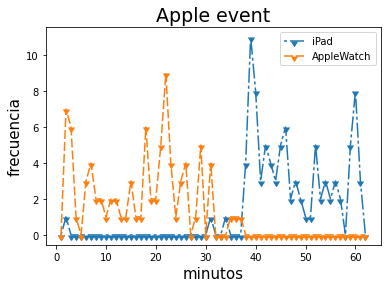

In [ ]:
import matplotlib.pyplot as plt

tiempo = range(1,63)
y = resultados['cant_iPad']
y2 = resultados['cant_AppleWatch']

fig, ax = plt.subplots()

line1, = ax.plot(tiempo, y, label='iPad',marker=11)
line1.set_dashes([2, 2, 10, 2])  # 2pt line, 2pt break, 10pt line, 2pt break
line2, = ax.plot(tiempo, y2, dashes=[6, 2], label='AppleWatch',marker=11)

plt.title("Apple event", fontsize=19)
plt.xlabel('minutos', fontsize=15)
plt.ylabel('frecuencia', fontsize=15)
ax.legend()
plt.show()